In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_csv(r"D:\Data Science\Innomatics Internship\Data Analysis\Streamlit_app_find_nearest_PUB\resources\data\open_pubs.csv",header=None)

In [72]:
df.columns = ['fsa_id','name','address','postcode','easting','northing','latitude','longitude','local_authority']
df

,fsa_id,name,address,postcode,easting,northing,latitude,longitude,local_authority
0,22,Anchor Inn,"Upper Street, Stratford St Mary, COLCHESTER",CO7 6LW,604749,234404,51.970379,0.979340,Babergh
1,36,Ark Bar Restaurant,"Ark Bar And Restaurant, Cattawade Street, Bran...",CO11 1RH,610194,233329,51.958698,1.057832,Babergh
2,74,Black Boy,"The Lady Elizabeth, 7 Market Hill, SUDBURY, Su...",CO10 2EA,587334,241316,52.038595,0.729915,Babergh
3,75,Black Horse,"Lower Street, Stratford St Mary, COLCHESTER",CO7 6JS,622675,-5527598,\N,\N,Babergh
4,76,Black Lion,"Lion Road, Glemsford, SUDBURY",CO10 7RF,622675,-5527598,\N,\N,Babergh
...,...,...,...,...,...,...,...,...,...
51326,597119,Wrexham & District War Memorial Club Ltd,"Wrexham War Memorial Club Farndon Street, Wrex...",LL13 8DE,333909,350438,53.047100,-2.987319,Wrexham
51327,597127,Wrexham Lager Social Club,"1 - 3 Union Road, Wrexham, Wrexham",LL13 7SR,333028,350563,53.048123,-3.000485,Wrexham
51328,597130,Wrexham Rail Sports & Social Club,"Sports And Social Club, 44 Brook Street, Wrexh...",LL13 7LU,333259,350213,53.044998,-2.996966,Wrexham
51329,597131,Wrexham Rugby Club,"Wrexham Rugby Club Bryn Estyn Road, Wrexham, W...",LL13 9TY,335808,351078,53.053094,-2.959124,Wrexham


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51331 entries, 0 to 51330
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   fsa_id           51331 non-null  int64 
 1   name             51331 non-null  object
 2   address          51331 non-null  object
 3   postcode         51331 non-null  object
 4   easting          51331 non-null  int64 
 5   northing         51331 non-null  int64 
 6   latitude         51331 non-null  object
 7   longitude        51331 non-null  object
 8   local_authority  51331 non-null  object
dtypes: int64(3), object(6)
memory usage: 3.5+ MB


In [74]:
df["latitude"].value_counts()

\N           767
51.310946     10
52.896164     10
53.178189      9
55.318954      8
            ... 
53.369771      1
53.390799      1
53.371238      1
53.361078      1
53.076638      1
Name: latitude, Length: 46810, dtype: int64

In [75]:
df["longitude"].value_counts()

\N           767
-0.655576     12
-1.853894     10
0.349896       9
-2.051721      8
            ... 
-2.734245      1
-2.735554      1
-2.733804      1
-2.735118      1
-3.050512      1
Name: longitude, Length: 46807, dtype: int64

In [76]:
#replacing '\N' with Null
df.replace({r'\N': np.nan}, inplace=True)

In [77]:
#dropping null rows
df.dropna(axis=0, inplace=True)

In [78]:
df.shape

(50564, 9)

In [79]:
df.latitude = df.latitude.astype("float")
df.longitude = df.longitude.astype("float")

In [80]:
df["local_authority"].value_counts().head(15)

County Durham               680
Leeds                       611
Cornwall                    557
Wiltshire                   544
Kirklees                    524
City of Edinburgh           506
Birmingham                  494
Buckinghamshire             485
Bradford                    478
Northumberland              446
East Riding of Yorkshire    432
Shropshire                  415
Bristol, City of            408
Dorset                      405
Fife                        404
Name: local_authority, dtype: int64

(array([  0., 100., 200., 300., 400., 500., 600., 700., 800.]),
 [Text(0.0, 0, '0'),
  Text(100.0, 0, '100'),
  Text(200.0, 0, '200'),
  Text(300.0, 0, '300'),
  Text(400.0, 0, '400'),
  Text(500.0, 0, '500'),
  Text(600.0, 0, '600'),
  Text(700.0, 0, '700'),
  Text(800.0, 0, '800')])

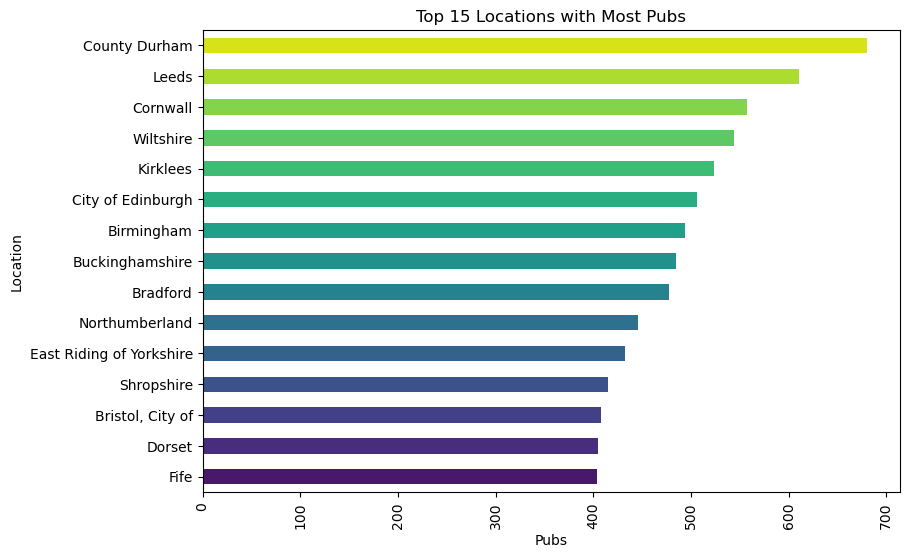

In [81]:
#top 15 locations with most PUBS
top_15_locations = df.local_authority.value_counts().head(15).sort_values()
colors = sns.color_palette("viridis", len(top_15_locations))
top_15_locations.plot(kind='barh', color=colors, figsize=(9,6))

# Customize the plot
plt.title("Top 15 Locations with Most Pubs")
plt.xlabel("Pubs")
plt.ylabel("Location")
plt.xticks(rotation=90)

In [83]:
!pip install folium

In [84]:
import folium

In [85]:
# Define the location and zoom level of the map
map_location = [51.970379, 0.979340]
zoom_level = 10

# Create the map object
map = folium.Map(location=map_location, zoom_start=zoom_level)

# Define the location and marker information
marker_location = [51.970379, 0.979340]
marker_tooltip = 'Open Pub'
marker_popup = 'Anchor Inn'

# Add a marker to the map
folium.Marker(location=marker_location, tooltip=marker_tooltip,
               popup=marker_popup, icon=folium.Icon(color='red')).add_to(map)

# Customize the map
folium.TileLayer('openstreetmap').add_to(map)

# Display the map
map

In [86]:
df.to_csv("cleaned.csv", index=False)